In [15]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np

In [45]:
IMAGE_SIZE = 256
CHANNELS = 3
BATCH_SIZE = 32
EPOCHS = 15

In [31]:
train = ImageDataGenerator(rescale = 1./255)
validation = ImageDataGenerator(rescale = 1./255)

In [32]:
TRAIN_PATH = "D:/potato_disease_classification/datasplitted/train"
VAL_PATH = "D:/potato_disease_classification/datasplitted/val"

In [33]:
train_data = train.flow_from_directory(TRAIN_PATH, 
                                       target_size=(IMAGE_SIZE,IMAGE_SIZE), 
                                       batch_size=BATCH_SIZE, 
                                       class_mode="categorical",
                                       seed=2022)

Found 1506 images belonging to 3 classes.


In [34]:
val_data = validation.flow_from_directory(VAL_PATH, 
                                       target_size=(IMAGE_SIZE,IMAGE_SIZE), 
                                       batch_size=BATCH_SIZE, 
                                       class_mode="categorical",
                                       seed=2022)

Found 430 images belonging to 3 classes.


In [35]:
train_data.class_indices

{'early_blight': 0, 'healthy': 1, 'late_blight': 2}

In [46]:
model = Sequential(
    [
        Conv2D(32,(3,3), activation='relu', input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)),
        MaxPooling2D(2,2),
        Conv2D(64,(3,3), activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(64,(3,3), activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(64,(3,3), activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(64,(3,3), activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(64,(3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(64, activation='relu'), 
        Dense(3, activation='softmax')  
    ]
)

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 64)      

In [47]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [48]:
history = model.fit(train_data,
                    steps_per_epoch = 1506/BATCH_SIZE,
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS,
                    validation_data = val_data
                   )

Epoch 1/15
47/47 [==============================] - 4s 77ms/step - loss: 0.9246 - accuracy: 0.4714 - val_loss: 0.8464 - val_accuracy: 0.4977
Epoch 2/15
47/47 [==============================] - 3s 73ms/step - loss: 0.7033 - accuracy: 0.6660 - val_loss: 0.5062 - val_accuracy: 0.7767
Epoch 3/15
47/47 [==============================] - 3s 73ms/step - loss: 0.3984 - accuracy: 0.8413 - val_loss: 0.3674 - val_accuracy: 0.8721
Epoch 4/15
47/47 [==============================] - 3s 74ms/step - loss: 0.2899 - accuracy: 0.8831 - val_loss: 0.2891 - val_accuracy: 0.8930
Epoch 5/15
47/47 [==============================] - 3s 73ms/step - loss: 0.1754 - accuracy: 0.9323 - val_loss: 0.1652 - val_accuracy: 0.9442
Epoch 6/15
47/47 [==============================] - 3s 74ms/step - loss: 0.1501 - accuracy: 0.9456 - val_loss: 0.1031 - val_accuracy: 0.9605
Epoch 7/15
47/47 [==============================] - 3s 73ms/step - loss: 0.1163 - accuracy: 0.9602 - val_loss: 0.2228 - val_accuracy: 0.9209
Epoch 8/15
47

In [49]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

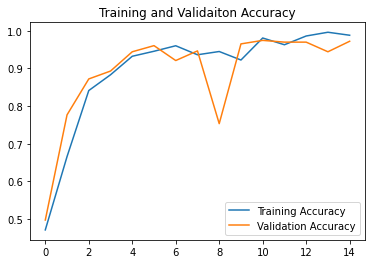

In [52]:
import matplotlib.pyplot as plt
plt.plot(range(EPOCHS), acc, label="Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label="Validation Accuracy")
plt.legend()
plt.title("Training and Validaiton Accuracy")
plt.show()

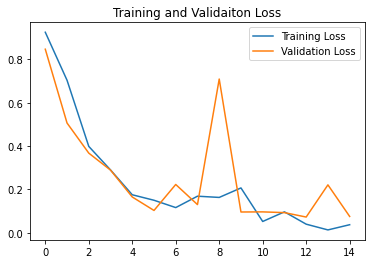

In [53]:
plt.plot(range(EPOCHS), loss, label="Training Loss")
plt.plot(range(EPOCHS), val_loss, label="Validation Loss")
plt.legend()
plt.title("Training and Validaiton Loss")
plt.show()

In [55]:
version=1
model.save(f"D:/potato_disease_classification/model/{version}")

INFO:tensorflow:Assets written to: D:/potato_disease_classification/model/1\assets


INFO:tensorflow:Assets written to: D:/potato_disease_classification/model/1\assets
